# <font face="Verdana" size=6 color='#6495ED'> ANÁLISE ESTATÍSTICA DE DADOS
<font face="Verdana" size=3 color='#40E0D0'> Profs. Larissa Driemeier e Arturo Forner-Cordero

<center><img src='./IAD_001_Y2024_L04_files/uc' width=800></center>

Este notebook faz parte da aula 04 do curso [IAD-001](https://alunoweb.net/moodle/pluginfile.php/140418/mod_resource/content/6/EST_04_Y2024.pdf).



# Importando bibliotecas

In [31]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import numpy as np
from numpy import linalg
from sklearn.decomposition import TruncatedSVD
import math

# Upload o file "Tiger.jpg" (ou qualquer outra imagem que você quiser)
uploaded = files.upload()

<ipython.core.display.html object=''>

Saving Dudu.png to Dudu (1).png


In [32]:
color_g1 = 'darkolivegreen'
color_g2 = 'olive'
color_g3 = 'forestgreen'
color_g4 = 'green'
color_p1 = 'darkmagenta'
color_p2 = 'mediumorchid'
color_p3 = 'thistle'
color_p4 = 'lavandablush'
color_b1 = 'navy'
color_b2 = 'royalblue'
color_b4 = 'slateblue'
color_r1 = 'indianred'

#Autovalores e autovetores

A definição de autovalores e autovetores será bastante usada nessa aula: para uma matriz quadrada $\mathbf A_{n\times n}$, um escalar $\lambda$ é chamado de autovalor de se houver um vetor não nulo $\mathbf x$ tal que
$$
\mathbf{Ax}=\lambda\mathbf{x}.
$$

Tal vetor, $\mathbf x$, é chamado de autovetor de $\mathbf A$ correspondente ao autovalor $\lambda$. Às vezes, nos referimos ao par como um par de autovalores. Por exemplo,
$$
\mathbf{Ax}=\begin{bmatrix}  3 &amp; 1 \\1&amp;3\end{bmatrix} \begin{bmatrix} 1\\1 \end{bmatrix} =\begin{bmatrix} 4\\4 \end{bmatrix}=4\begin{bmatrix} 1\\1 \end{bmatrix} = \lambda\mathbf{x}
$$

Daqui segue que $\mathbf x$ é um autovetor de $\mathbf A$ e o autovalor correspondente é $\lambda$.


 Porém, desta vez, iremos utilizar a biblioteca `linalg` para calcular autovalores e autovetores. Caso essa pequena recordação não seja suficiente para você, volte à aula anterior e relembre.

<center><img src='./IAD_001_Y2024_L04_files/uc(1)' width="400"></center>


Para a biblioteca `linalg` retornar autovalores `lam` e autovetores `u` da matriz `A`, tem-se o comando:
```
lam,u = linalg.eig(A)
```

Na resposta abaixo tem-se o primeiro invariante e seu respectivo autovetor em vermelho e o segundo em azul.

<center><img src='./IAD_001_Y2024_L04_files/uc(2)' width="200"></center>



In [ ]:
A = np.array([[3,2],[0,2]])
# Cálculo de autovalores e autovetores
lam, u = linalg.eig(A)
print("autovalores=\n", np.round(lam, 4))
print("autovetores=\n", np.round(u, 4))

In [ ]:
A = np.array([[7,3],[3,-1]])
# Cálculo de autovalores e autovetores
lam, u = linalg.eig(A)
print("autovalores=\n", np.round(lam, 4))
print("autovetores=\n", np.round(u, 4))

In [ ]:
A = np.array([[3, 1],
              [1, 0.8]])
# Cálculo de autovalores e autovetores
lam, u = linalg.eig(A)
print("autovalores=\n", np.round(lam, 4))
print("autovetores=\n", np.round(u, 4))

#Transformação

A matriz de transformação $\boldsymbol{A}$ *transformou* o círculo da figura abaixo em uma elipse.

![Transf_Circle_Asym](https://drive.google.com/uc?export=view&amp;id=1Vi_LgXQ9I-0UcTk-f8BShmR6wPIPoyEQ)




Para verificar a diferença entre uma matriz simétrica e não simétrica, substitua a matriz  $\boldsymbol{A}$ do código abaixo pelas matrizes:

\begin{equation}
\boldsymbol{A} = \begin{bmatrix}3 &amp; 2 \\ 0 &amp; 2 \end{bmatrix}
\end{equation}
e depois,
\begin{equation}
\boldsymbol{A} = \begin{bmatrix}3 &amp; 1 \\ 1 &amp; 2 \end{bmatrix}
\end{equation}

In [ ]:
# Cálculo de autovalores e autovetores
#A = np.array([[3, 2],
#             [0, 2]])
A = np.array([[3, 1],
              [1, 2]])
lam, u = linalg.eig(A)
print("autovalores=", np.round(lam, 4))
print("autovetores=", np.round(u, 4))


É possível perceber que, quando a matriz é simétrica, os autovetores estão alinhados com os eixos principal e secundário da elipse.

![Wall-E](https://drive.google.com/uc?export=view&amp;id=1SikuSQ8_p4O4Wux56Ih00GrQtPCHy5nr)

Para você entender melhor o que definimos acima, o algoritmo abaixo foi adaptado do [link](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d) e é usado para gerar gráficos e tornar as trasnformações mais visuais.

__Não se preocupe muito em entender o algoritmo. Entenda somente as imagens que foram geradas.__

In [25]:
def graph(u,A):
  # Creating the vectors for a circle and storing them in x
  xi1 = np.linspace(-1.0, 1.0, 100)
  xi2 = np.linspace(1.0, -1.0, 100)
  yi1 = np.sqrt(1 - xi1**2)
  yi2 = -np.sqrt(1 - xi2**2)

  xi = np.concatenate((xi1, xi2),axis=0)
  yi = np.concatenate((yi1, yi2),axis=0)
  x = np.vstack((xi, yi))

  # getting a sample vector from x
  x_sample1 = u[:,0]
  x_sample2 = u[:,1]

  t = A @ x  # Vectors in t are the transformed vectors of x

  origin = [0], [0] # origin point

  t_sample1 = A @ x_sample1
  t_sample2 = A @ x_sample2

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

  plt.subplots_adjust(wspace=0.4)

  # Plotting x
  ax1.plot(x[0,:], x[1,:], color=color_b2)
  ax1.quiver(*origin, x_sample1[0], x_sample1[1], color=[color_g1], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax1.quiver(*origin, x_sample2[0], x_sample2[1], color=[color_g2], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax1.set_xlabel('x', fontsize=14)
  ax1.set_ylabel('y', fontsize=14)
  ax1.set_xlim([-4,4])
  ax1.set_ylim([-4,4])
  ax1.set_aspect('equal')
  ax1.grid(True)
  ax1.set_axisbelow(True)
  ax1.set_title("Vetores originais")
  ax1.axhline(y=0, color='k')
  ax1.axvline(x=0, color='k')
  ax1.text(x_sample1[0], x_sample1[1], "$\mathbf{u_1}$", color=color_g1, fontsize=14)
  ax1.text(x_sample2[0], x_sample2[1], "$\mathbf{u_2}$", color=color_g2, fontsize=14)

  # Plotting t
  ax2.plot(t[0, :], t[1, :], color=color_b2)
  ax2.quiver(*origin, t_sample1[0], t_sample1[1], color=[color_g1], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax2.quiver(*origin, t_sample2[0], t_sample2[1], color=[color_g2], width=0.012, angles='xy', scale_units='xy', scale=1)
  max_value = np.max(np.array([math.ceil(t_sample2[0]),math.ceil(t_sample1[0]),math.ceil(t_sample2[1]),math.ceil(t_sample1[1])]))
  ax2.set_xlim([-max_value,max_value])
  ax2.set_ylim([-max_value,max_value])

  ax2.set_aspect('equal')
  ax2.grid(True)
  ax2.set_axisbelow(True)
  ax2.set_title("Novos vetores após transformação")
  ax2.axhline(y=0, color='k')
  ax2.axvline(x=0, color='k')
  ax2.text(t_sample1[0], t_sample1[1], "$\mathbf{t_1}$", color=color_g1, fontsize=14)
  ax2.text(t_sample2[0], t_sample2[1], "$\mathbf{t_2}$", color=color_g2, fontsize=14)
  plt.savefig('2.png', dpi=300, bbox_inches='tight')

  plt.show()

In [ ]:
graph(u,A)

In [13]:
def ellipseT(u,A):
  # Creating the vectors for a circle and storing them in x
  xi1 = np.linspace(-1.0, 1.0, 100)
  xi2 = np.linspace(1.0, -1.0, 100)
  yi1 = np.sqrt(1 - xi1**2)
  yi2 = -np.sqrt(1 - xi2**2)

  xi = np.concatenate((xi1, xi2),axis=0)
  yi = np.concatenate((yi1, yi2),axis=0)
  x = np.vstack((xi, yi))

  # getting a sample vector from x
  x_sample1 = u[:,0]
  x_sample2 = u[:,1]

  t = A @ x  # Vectors in t are the transformed vectors of x

  origin = [0], [0] # origin point

  t_sample1 = A @ x_sample1
  t_sample2 = A @ x_sample2

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

  plt.subplots_adjust(wspace=0.4)
# Plotting x
  ax1.plot(x[0,:], x[1,:], color=color_b2)
  ax1.set_xlabel('x', fontsize=14)
  ax1.set_ylabel('y', fontsize=14)
  ax1.set_xlim([-4,4])
  ax1.set_ylim([-4,4])
  ax1.set_aspect('equal')
  ax1.grid(True)
  ax1.set_axisbelow(True)
  ax1.set_title("Vetores originais")

  ax2.plot(t[0, :], t[1, :], color=color_b2)
  ax2.set_xlabel('x', fontsize=14)
  ax2.set_ylabel('y', fontsize=14)
  max_value = np.max(np.array([math.ceil(t_sample2[0]),math.ceil(t_sample1[0]),math.ceil(t_sample2[1]),math.ceil(t_sample1[1])]))
  ax2.set_xlim([-max_value,max_value])
  ax2.set_ylim([-max_value,max_value])
  ax2.set_aspect('equal')
  ax2.grid(True)
  ax2.set_axisbelow(True)
  ax2.set_title("Novos vetores após transformação")


  plt.show()

In [ ]:
ellipseT(u,A)

#Decomposição em autovalores
Toda matriz simétrica quadrada $\boldsymbol{A}_{n \times n}$ pode ser decomposta em,
$$
\boldsymbol{A}=\boldsymbol{U}\boldsymbol{S}\boldsymbol{U}^T
$$
ou, equivalentemente,
\begin{equation}
\boldsymbol{A} = \begin{bmatrix} a_{1,1} &amp; a_{1,2} &amp; \ldots &amp; a_{1,n} \\  
a_{2,1} &amp; a_{2,2} &amp; \ldots &amp; ax_{2,n} \\  
 \vdots &amp; \vdots &amp; \ddots &amp; \vdots &amp; \vdots\\  
a_{n,1} &amp; a_{n,2} &amp; \ldots &amp; a_{n,n} \end{bmatrix}=
\begin{bmatrix} \vdots &amp; \vdots &amp; \ldots &amp; \vdots \\  
\boldsymbol{u}_1 &amp; \boldsymbol{u}_2 &amp; \ldots &amp; \boldsymbol{u}_n \\  
 \vdots &amp; \vdots &amp; \ddots &amp; \vdots
 \end{bmatrix}
 \begin{bmatrix} \lambda_1 &amp; 0 &amp; \ldots &amp; 0 \\  
0 &amp; \lambda_2 &amp; \ldots &amp; 0\\  
 \vdots &amp; \vdots &amp; \ddots &amp; \vdots
 \\  
0 &amp; \vdots &amp; 0 &amp;  \lambda_n
 \end{bmatrix}
 \begin{bmatrix} \ldots &amp; \boldsymbol{u}_1^T &amp; \ldots  \\  
\ldots &amp; \boldsymbol{u}_2^T &amp; \ldots \\  
 \vdots &amp; \vdots &amp; \ddots &amp;  \\  
\ldots &amp; \boldsymbol{u}_n^T &amp; \ldots
 \end{bmatrix}
\end{equation}
onde $\boldsymbol{u}_i$ são $n$ LI autovetores de $\boldsymbol{A}$ e $\lambda_i$ são os autovalores de $\boldsymbol{A}$.

Pode-se mostrar que a matriz simétrica $\boldsymbol{A}$ pode ser escrita como,
$$
𝑨=\lambda_1 \boldsymbol{u}_1 \boldsymbol{u}_1^T+\lambda_2 \boldsymbol{u}_2 \boldsymbol{u}_2^T+\cdots +\lambda_𝑘 \boldsymbol{u}_𝑘 \boldsymbol{u}_k^T+\cdots+\lambda_𝑛 \boldsymbol{u}_n \boldsymbol{u}_n^T
$$
onde, para o caso de matriz simétrica definida positiva (todos autovalores são positivos),
$$
\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_k \cdots \geq \lambda_n \geq 0
$$
Quanto maior o autovalor, maior o comprimento do vetor resultante $\lambda_𝑘 \boldsymbol{u}_𝑘 \boldsymbol{u}_k^T$ e mais peso é dado à sua matriz correspondente $\boldsymbol{u}_𝑖 \boldsymbol{u}_𝑖^𝑇$. Assim, podemos aproximar nossa matriz simétrica original $\boldsymbol{A}$ somando os termos que têm os maiores autovalores,
$$
\boldsymbol{A}\approx \boldsymbol{A}_k = \lambda_1 \boldsymbol{u}_1 \boldsymbol{u}_1^T+\lambda_2 \boldsymbol{u}_2 \boldsymbol{u}_2^T+\cdots +\lambda_𝑘 \boldsymbol{u}_𝑘 \boldsymbol{u}_k^T
$$


## Interpretação importante

Agora, iremos calcular $\boldsymbol{A}_1 = \lambda_1 \boldsymbol{u}_1 \boldsymbol{u}_1^T$ para a matriz

\begin{equation}
\boldsymbol{A} = \begin{bmatrix}3 &amp; 1 \\ 1 &amp; 2 \end{bmatrix}
\end{equation}
e aplicaremos em nosso círculo, para entendermos o papel de cada termo da matriz $\boldsymbol{A}$ na transformação.

In [ ]:
A = np.array([[3, 1],
              [1, 2]])
lam, u = linalg.eig(A)
print("autovalores=\n", np.round(lam, 4))
print("autovetores=\n", np.round(u, 4))
S=np.array([[lam[0], 0],
              [0, lam[1]]])
u1 = np.array(u[:,0])
u2 =np.array(u[:,1])
P=np.array([u1,u2]).T


t = P @ S @ P.T
print("Recupera-se a matriz A\n",t)

In [ ]:
A1 = lam[0]*np.outer(u1,u1)
print('A1\n',A1)
A2 = lam[1]*np.outer(u2,u2)
print('A2\n',A2)

Como é possível observar, na figura abaixo, o círculo inicial é alongado ao longo de $\boldsymbol{u}_1$ e reduzido a zero ao longo de $\boldsymbol{u}_2$. Portanto, o resultado dessa transformação é uma linha reta, não uma elipse.

Isso é consistente com o fato de que $\boldsymbol{A}_1$ é uma matriz de projeção em $\boldsymbol{u}_1$, então o resultado deve ser uma linha reta ao longo de $\boldsymbol{u}_1$.



In [ ]:
graph(u,A)

Veja o exemplo 3D:

\begin{equation}
\boldsymbol{A} = \begin{bmatrix}4 &amp; 1 &amp; 3 \\ 1 &amp; 7 &amp; -2 \\ 3 &amp; -2 &amp; 4 \end{bmatrix}
\end{equation}
e aplicaremos em nosso círculo, para entendermos o papel de cada termo da matriz $\boldsymbol{A}$ na transformação.

In [15]:
A = np.array([[4, 1, 3],
              [8, 7, -2],
              [1, 5, 4]])

In [16]:
# extraído do link: https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d
# Desenha imagens 3D

def graph3D(A, i=70, j=30):
  U, s, VT = linalg.svd(A)
  Sigma = np.zeros((A.shape[0], A.shape[1]))

  Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
  A_rank1 = U[:, :1] @ Sigma[:1, :1] @ VT[:1, :]
  A_rank2 = U[:, :2] @ Sigma[:2, :2] @ VT[:2, :]

  u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
  xi = np.cos(u)*np.sin(v)
  yi = np.sin(u)*np.sin(v)
  zi = np.cos(v)

  x = np.vstack((xi.reshape(1,-1), yi.reshape(1,-1), zi.reshape(1,-1)))

  t1 = A @ x
  t2 = A_rank2 @ x
  t3 = A_rank1 @ x

  tx1 = t1[0,:].reshape(30,20)
  ty1 = t1[1,:].reshape(30,20)
  tz1 = t1[2,:].reshape(30,20)

  tx2 = t2[0,:].reshape(30,20)
  ty2 = t2[1,:].reshape(30,20)
  tz2 = t2[2,:].reshape(30,20)

  tx3 = t3[0,:].reshape(30,20)
  ty3 = t3[1,:].reshape(30,20)
  tz3 = t3[2,:].reshape(30,20)

  fig = plt.figure(figsize=(20,10))
  plt.subplots_adjust(wspace=0.03)
  ax1 = fig.add_subplot(131, projection='3d')
  ax2 = fig.add_subplot(132, projection='3d')
  ax3 = fig.add_subplot(133, projection='3d')

  # plot 1
  ax1.plot_wireframe(tx1, ty1, tz1, color=color_b2, alpha=0.2)
  ax1.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax1.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color=color_g1)
  ax1.quiver(0, 0, 0, s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax1.text(s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], "$\sigma_2\mathbf{u_2}$", fontsize=18, color=color_g1)
  ax1.quiver(0, 0, 0, s[2]*U[0,2], s[2]* U[1,2], s[2]*U[2,2], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax1.text(s[2]*U[0,2], s[2]* U[1,2], s[2]*U[2,2], "$\sigma_3\mathbf{u_3}$", fontsize=18, color=color_g1)

  ax1.set_xlabel("x", fontsize=18)
  ax1.set_ylabel("y", fontsize=18)
  ax1.set_zlabel("z", fontsize=18)
  ax1.set_xlim([-10,5])
  ax1.set_ylim([-12, 12])
  ax1.set_zlim([-6, 6])
  ax1.set_title(r"$\mathbf{Ax}$", fontsize=18)

  # plot 2
  ax2.plot_surface(tx2, ty2, tz2, color=color_b2, alpha=0.2)
  ax2.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax2.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color=color_g1)
  ax2.quiver(0, 0, 0, s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax2.text(s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], "$\sigma_2\mathbf{u_2}$", fontsize=18, color=color_g1)
  ax2.set_xlim([-10, 5])
  ax2.set_ylim([-12, 12])
  ax2.set_zlim([-6, 6])
  ax2.set_xlabel("x", fontsize=18)
  ax2.set_ylabel("y", fontsize=18)
  ax2.set_zlabel("z", fontsize=18)
  ax2.set_title(r"$\mathbf{A}_{2}\mathbf{x}=\sigma_1\mathbf{u}_1\mathbf{u}_1^T\mathbf{x}+\sigma_2\mathbf{u}_2\mathbf{u}_2^T\mathbf{x}$", fontsize=18)

  # plot 3
  ax3.plot_wireframe(tx3, ty3, tz3, color=color_b2, alpha=0.02)
  ax3.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax3.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color=color_g1)
  ax3.set_xlim([-10, 5])
  ax3.set_ylim([-12, 12])
  ax3.set_zlim([-6, 6])
  ax3.set_xlabel("x", fontsize=18)
  ax3.set_ylabel("y", fontsize=18)
  ax3.set_zlabel("z", fontsize=18)
  ax3.set_title(r"$\mathbf{A}_{1}\mathbf{x}=\sigma_1\mathbf{u}_1\mathbf{u}_1^T\mathbf{x}$", fontsize=18)

  ax1.view_init(i, j)
  ax2.view_init(i, j)
  ax3.view_init(i, j)

  plt.draw()

In [ ]:
i,j = 50, 120
graph3D(A,i,j)

# Valores singulares de uma matriz

Chamamos de valores singulares da matriz $\boldsymbol{A}_{m \times n}$, $\lambda_1, \lambda_2, \cdots, \lambda_r$, as $r$ raízes quadradas dos autovalores não nulos $\boldsymbol{A}\boldsymbol{A}^T$ ou $\boldsymbol{A}^T\boldsymbol{A}$;
$$
\sigma_i=\sqrt{\lambda_i}
$$
Os vetores singulares $\boldsymbol{u}_i$ à esquerda da matriz $\boldsymbol{A}$ são os autovetores de $\boldsymbol{A}\boldsymbol{A}^T$, $m \times m$.
Os vetores singulares $\boldsymbol{v}_i$ à direita da matriz $\boldsymbol{A}$ são os autovetores de $\boldsymbol{A}^T\boldsymbol{A}$, $n \times n$.  

Os autovetores de  $\boldsymbol{A}\boldsymbol{A}^T$ formam as colunas da matriz $\boldsymbol{U}$ e os autovetores de $\boldsymbol{A}^T\boldsymbol{A}$ formam as colunas da matriz $\boldsymbol{V}$. Como são simétricas, os autovetores podem ser definidos ortonormais, ié, perpendiculares entre si e de comprimento unitário, de forma que:
 $$\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{I}$$
  $$\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{I}$$

In [18]:
A = np.array([[3, 2],
              [0, 2]])
ATA = A.T @ A
AAT = A @ A.T

In [ ]:
# Cálculo de autovalores e autovetores
lamu, u = linalg.eig(AAT)
print("AA^T=\n", np.round(AAT, 4))
print("autovalores=\n", np.round(lamu, 4))
print("autovetores=\n", np.round(u, 4))

Lembrem-se que os autovetores são normalizados, de modo que a coluna `u[:,i]` é o autovetor correspondente ao autovalor `lam[i]`.

In [ ]:
# Cálculo de autovalores e autovetores
lamv, v = linalg.eig(ATA)
print("A^TA=\n", np.round(ATA, 4))
print("autovalores=\n", np.round(lamv, 4))
print("autovetores=\n", np.round(v, 4))

A orientação dos autovetores pode ocasionalmente diferir, mas tudo bem — afinal, um autovetor é invariante em escala.

In [ ]:
graph(u,AAT)

In [ ]:
graph(v,ATA)

Teste agora com a matriz,

\begin{equation}
\mathbf{A} = \begin{bmatrix} 3 &amp; 2 &amp; 2 \\
                             2 &amp; 3 &amp; -2 \end{bmatrix}
\end{equation}

In [ ]:
A = np.array([[3, 2, 2],
              [2, 3, -2]])
ATA = A.T @ A
AAT = A @ A.T
print(ATA,AAT)

In [ ]:
# Cálculo de autovalores e autovetores
lamu, u = linalg.eig(AAT)
print("AA^T=\n", np.round(AAT, 4))
print("autovalores=\n", np.round(lamu, 4))
print("autovetores=\n", np.round(u, 4))

In [ ]:
# Cálculo de autovalores e autovetores
lamv, v = linalg.eig(ATA)
print("A^TA=\n", np.round(ATA, 4))
print("autovalores=\n", np.round(lamv, 4))
print("autovetores=\n", np.round(v, 4))

#Decomposição em valor singular

O SVD (Singular Value Decomposition) é um método para a fatorar matrizes:
$$
\boldsymbol{A}=\boldsymbol{U}\boldsymbol{S}\boldsymbol{V}^T
$$
onde $\boldsymbol{U}$ e $\boldsymbol{V}$ são as matrizes ortogonais que definimos e $\boldsymbol{S}$ é diagonal.

Os valores da matriz diagonal $\boldsymbol{S}$ são os valores singulares que acabamos de aprender, e por isso a decomposição recebe este nome.

O número de valores singulares diferentes de zero é igual ao rank da matriz $\boldsymbol{A}$.

## Exercício

Agora, resolva você:

\begin{equation}
\boldsymbol{A} = \begin{bmatrix}4 &amp; 1 &amp; 3 \\ 8 &amp; 7 &amp; -2 \\ 1 &amp; 5 &amp; 4 \end{bmatrix}
\end{equation}
e aplicaremos em nosso círculo, para entendermos o papel de cada termo da matriz $\boldsymbol{A}$ na transformação.

In [ ]:
A = np.array([[4, 1, 3],
              [8, 7, -2],
              [1, 5, 4]])

In [ ]:
# extraído do link: https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d
# Desenha imagens 3D

def graph3D(A, i=70, j=30):
  U, s, VT = linalg.svd(A)
  Sigma = np.zeros((A.shape[0], A.shape[1]))

  Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
  A_rank1 = U[:, :1] @ Sigma[:1, :1] @ VT[:1, :]
  A_rank2 = U[:, :2] @ Sigma[:2, :2] @ VT[:2, :]

  u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
  xi = np.cos(u)*np.sin(v)
  yi = np.sin(u)*np.sin(v)
  zi = np.cos(v)

  x = np.vstack((xi.reshape(1,-1), yi.reshape(1,-1), zi.reshape(1,-1)))

  t1 = A @ x
  t2 = A_rank2 @ x
  t3 = A_rank1 @ x

  tx1 = t1[0,:].reshape(30,20)
  ty1 = t1[1,:].reshape(30,20)
  tz1 = t1[2,:].reshape(30,20)

  tx2 = t2[0,:].reshape(30,20)
  ty2 = t2[1,:].reshape(30,20)
  tz2 = t2[2,:].reshape(30,20)

  tx3 = t3[0,:].reshape(30,20)
  ty3 = t3[1,:].reshape(30,20)
  tz3 = t3[2,:].reshape(30,20)

  fig = plt.figure(figsize=(20,10))
  plt.subplots_adjust(wspace=0.03)
  ax1 = fig.add_subplot(131, projection='3d')
  ax2 = fig.add_subplot(132, projection='3d')
  ax3 = fig.add_subplot(133, projection='3d')

  # plot 1
  ax1.plot_wireframe(tx1, ty1, tz1, color=color_b2, alpha=0.2)
  ax1.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax1.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color=color_g1)
  ax1.quiver(0, 0, 0, s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax1.text(s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], "$\sigma_2\mathbf{u_2}$", fontsize=18, color=color_g1)
  ax1.quiver(0, 0, 0, s[2]*U[0,2], s[2]* U[1,2], s[2]*U[2,2], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax1.text(s[2]*U[0,2], s[2]* U[1,2], s[2]*U[2,2], "$\sigma_3\mathbf{u_3}$", fontsize=18, color=color_g1)

  ax1.set_xlabel("x", fontsize=18)
  ax1.set_ylabel("y", fontsize=18)
  ax1.set_zlabel("z", fontsize=18)
  ax1.set_xlim([-10,5])
  ax1.set_ylim([-12, 12])
  ax1.set_zlim([-6, 6])
  ax1.set_title(r"$\mathbf{Ax}$", fontsize=18)

  # plot 2
  ax2.plot_surface(tx2, ty2, tz2, color=color_b2, alpha=0.2)
  ax2.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax2.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color=color_g1)
  ax2.quiver(0, 0, 0, s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax2.text(s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], "$\sigma_2\mathbf{u_2}$", fontsize=18, color=color_g1)
  ax2.set_xlim([-10, 5])
  ax2.set_ylim([-12, 12])
  ax2.set_zlim([-6, 6])
  ax2.set_xlabel("x", fontsize=18)
  ax2.set_ylabel("y", fontsize=18)
  ax2.set_zlabel("z", fontsize=18)
  ax2.set_title(r"$\mathbf{A}_{2}\mathbf{x}=\sigma_1\mathbf{u}_1\mathbf{v}_1^T\mathbf{x}+\sigma_2\mathbf{u}_2\mathbf{v}_2^T\mathbf{x}$", fontsize=18)

  # plot 3
  ax3.plot_wireframe(tx3, ty3, tz3, color=color_b2, alpha=0.02)
  ax3.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color=color_g1, length=1, arrow_length_ratio=0.07)
  ax3.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color=color_g1)
  ax3.set_xlim([-10, 5])
  ax3.set_ylim([-12, 12])
  ax3.set_zlim([-6, 6])
  ax3.set_xlabel("x", fontsize=18)
  ax3.set_ylabel("y", fontsize=18)
  ax3.set_zlabel("z", fontsize=18)
  ax3.set_title(r"$\mathbf{A}_{1}\mathbf{x}=\sigma_1\mathbf{u}_1\mathbf{v}_1^T\mathbf{x}$", fontsize=18)

  ax1.view_init(i, j)
  ax2.view_init(i, j)
  ax3.view_init(i, j)

  plt.draw()

In [ ]:
i,j = 50, 120
graph3D(A,i,j)

In [ ]:
U, S, VT = linalg.svd(A)
print(S)
print(U)
print(VT.T)

# Aplicação SVD

Esta parte do Notebook tem como objetivo mostrar uma aplicação direta de SVD (Decomposição de Valor Singular).

## SVD para pseudoinversa
A pseudoinversa é a generalização da matriz inversa de matrizes quadradas para matrizes retangulares, onde o número de linhas e colunas não são iguais. Também é chamada de inverso de Moore-Penrose, após dois descobridores independentes do método.

In [ ]:
A = np.array([
	[0.1, 0.2],
	[0.3, 0.4],
	[0.5, 0.6],
	[0.7, 0.8]])
print(A)

In [ ]:
# Calcula-se SVD
U, s, VT = linalg.svd(A)
# recíproco de S
d = 1.0 / s
# Criação da matriz S diagonal com zeros
S = np.zeros(A.shape)
# Preencher S com matriz diagonal n x n
S[:A.shape[1], :A.shape[1]] = np.diag(d)
# Pseudoinversa B
B = VT.T.dot(S.T).dot(U.T)
print(B)

ou pode-se utilizar a biblioteca de Álgebra Linear do Python.

In [ ]:
B = linalg.pinv(A)
print(B)

Veja que a pseudoinversa respeita a propriedade,

$$
\boldsymbol{A}\boldsymbol{A}^+\boldsymbol{A}=\boldsymbol{A}^T
$$

In [ ]:
A @ B @ A

Porém, não necessariamente irá respeitar a propriedade inversa usual mais forte
$$
\boldsymbol{A}\boldsymbol{A}^{+}=\boldsymbol{A}^{+}\boldsymbol{A}=\boldsymbol{I}
$$

In [ ]:
A @ B

a resposta acima é diferente da identidade.

## Redução de dimensionalidade

Uma aplicação popular do SVD é para redução de dimensionalidade.

Dados com um grande número de recursos, como mais recursos (colunas) do que observações (linhas), podem ser reduzidos a um subconjunto menor de recursos que são mais relevantes para o problema.

O resultado é uma matriz com um rank mais baixo que se diz aproximar da matriz original.

Para fazer isso, podemos realizar uma operação SVD nos dados originais e selecionar os $k$ maiores valores singulares em $\boldsymbol{S}$. Estas colunas podem ser selecionadas de Sigma e as linhas selecionadas de V^T.

In [ ]:
A = np.array([
              [-1.03,0.74,-0.02,0.51,-1.31,0.99,0.69,-0.12,-0.72,1.11],
              [-2.23,1.61,-0.02,0.88,-2.39,2.02,1.62,-0.35,-1.67,2.46]
              ])

In [ ]:
x = A[0,:]
y = A[1,:]
m, b = np.polyfit(x,y, 1)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(-3., 5., 1.))
ax.set_yticks(np.arange(-3., 5., 1.))
plt.scatter(x, y, c=y, marker="o")
plt.plot(x, m*x + b,linewidth=0.5)
plt.xlim(-2,2)
plt.ylim(-3,3)
plt.grid()

plt.show()


In [ ]:
U, S, VT = linalg.svd(A)
print(S)

Com um valor singular muito maior que o outro, pode-se assumir que o pequeno valor de $\sigma_2$ é devido ao ruído nos dados e que esse valor singular seria idealmente zero.


In [ ]:
u1 = np.array(U[:,0])
u2 = np.array(U[:,1])
v1T = np.array(VT[0,:])
v2T = np.array(VT[1,:])
sigma1 = S[0]
sigma2 = S[1]
A1 = sigma1*np.outer(u1,v1T)
print(A1)

In [ ]:
x = A1[0,:]
y = A1[1,:]
m, b = np.polyfit(x,y, 1)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(-3., 5., 1.))
ax.set_yticks(np.arange(-3., 5., 1.))
plt.scatter(x, y, c=y, marker="o")

plt.plot(x, m*x + b,linewidth=0.5)
plt.xlim(-2,2)
plt.ylim(-3,3)
plt.grid()
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.gca()
delta = 0.2
ax.quiver(0, 0, sigma1*u1[0], sigma1*u1[1], scale = 20, color=color_p1)
q=ax.quiver(0, 0, sigma2*u2[0], sigma2*u2[1], scale = 3, color=color_p2)
ax.text(u1[0]+delta, u1[1]+delta, "$\mathbf{u}_1$", fontsize=12, color=color_p1)
ax.text(u2[0], u2[1], "$\mathbf{u}_2$", fontsize=12, color=color_p2)
plt.scatter(x, y, c=y, marker="o")

plt.grid()

plt.axis('equal')

plt.show()

## Armazenamento de imagens
SVD é tradicionalmente usado para armazenar imagens, economizando espaço.

A maneira trivial de armazenar uma imagem colorida de resolução $m \times n$ seria armazenar a cor (RGB) de cada pixel, levando a uma matriz $m \times n \times 3$. No caso de imagens em preto e branco, a imagem seria armazenada como uma matriz $m \times n \times 1$. De qualquer maneira, ocuparia um espaço grande.

Na teoria, percebeu-se que é possível reduzir o tamanho dos dados utilizando-se apenas os primeiros $k$ valores singulares para armazenamento. O que acontece se reduzirmos os dados de uma figura para alguns valores $k$?

Este é um exemplo tradicional, como pode ser visto em [exemplo 01](https://share.cocalc.com/share/c4479738-dfeb-4b2d-8d16-367881a21457/SVD%20of%20a%20picture.ipynb?viewer=share), [exemplo 02](https://www.frankcleary.com/svdimage/) ou [exemplo 03](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition//).



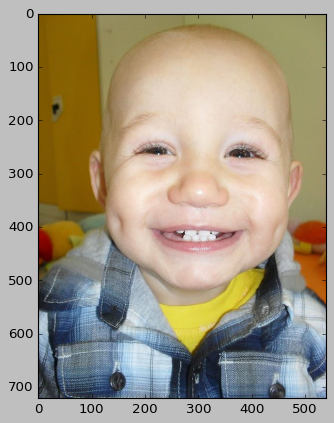

In [34]:
plt.style.use('classic')
#
# Escolohe a imagem para trabalhar
#
img = Image.open('Dudu.png')
plt.imshow(img);

### Converte imagem para branco-preto

LA quer dizer: L (pixels de 8-bit, branco-preto) com ALPHA (transparência)

$L = R \frac{299}{1000} + G \frac{587}{1000} + B \frac{114}{100} $

usando a técnica ITU-R 601-2 luma transform. Retorna um objeto imagem

(720, 540, 2)
<pil.image.image image='' mode='LA' size='540x720' at='' 0x7bc1141475b0=''>


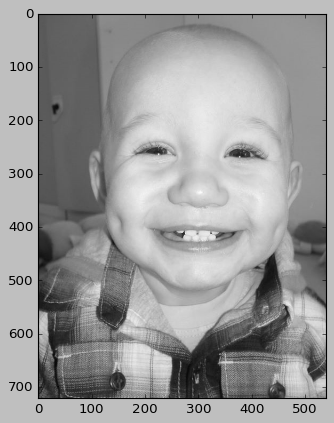

In [35]:
imggray = img.convert('LA')
print(np.shape(imggray))
print(imggray)

plt.imshow(imggray, cmap='gray');

### Converte a imagem para uma array numpy

O comando

```
imggray.getdata(band=0)
```
retorna o conteúdo de nossa imagem como um objeto sequencial (valores de cada linha) que contém os valores RGB de pixel.

Como o objeto retornado por este método é um tipo de dado interno da classe PIL, suporta apenas determinadas operações. Para convertê-lo em uma sequência comum, usamos `list(im.getdata(band=0))`.

(388800,)
(720, 540)


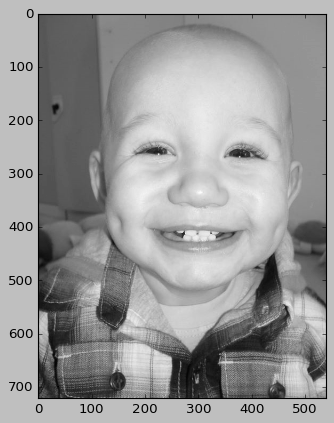

In [36]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
print(np.shape(imgmat))
# Reshape de acordo com as dimensões da imagem original
imgmat.shape = (imggray.size[1], imggray.size[0])
print(np.shape(imgmat))
# Plotando o resultado para mostrar que os dados não são alterados.
plt.imshow(imgmat, cmap='gray')
plt.show()

### Cálculo de SVD e reconstrução

Os vetores singulares e os valores singulares são ordenados com os primeiros correspondentes à maior variação. Por esse motivo, o uso apenas dos primeiros vetores e valores singulares fornecerá a reconstrução dos principais elementos da imagem.
Vamos decompor a imagem em valor singular,

$\boldsymbol{A}=\boldsymbol{UDV}^T$

e ir reconstruindo (brincando...), $k=1,2,...,n$, até encontrarmos um valor $k$ que reconstrua razoavelmente a imagem.

In [37]:
U, S, V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U.shape)
print(S.shape)
print(V.shape)

(720, 540)
(720, 720)
(540,)
(540, 540)


Se nossa imagem $\boldsymbol{A}$ tem dimensão $m \times n$, a matriz à esquerda $\boldsymbol{U}=\boldsymbol{AA}^T$ terá dimensão $m \times m$, a matriz digonal $\boldsymbol{S}$ terá dimensão $m \times n$ e a matriz à direita $\boldsymbol{V}=\boldsymbol{A}^T\boldsymbol{A}$ terá dimensão $n \times n$.

Primeiramente, vamos reconstruir a matriz usando apenas o primeiro valor singular. Isto é, a primeira aproximação da imagem será usando somente a primeira coluna de $\boldsymbol{U}$, ié, $\boldsymbol{u}_1$ de dimensão $m \times 1$, o primeiro termo da matriz diagonal $\boldsymbol{S}$, e a primeira linha de $\boldsymbol{V}$, $\boldsymbol{v}_1^T$ de dimensão $1 \times n$:

$\boldsymbol{u}_{1_{m \times 1}} \cdot s_{11} \cdot \boldsymbol{v}_{1_{1 \times n}}^T=\boldsymbol{A}_{m \times n}$

Essa figura reproduz os recursos mais proeminentes da imagem, a área clara na lateral direita (região do rosto) e a área escura lateral esquerda (fundo da foto). É possível já perceber o xadrez da camisa?!? Cada coluna de pixels nesta imagem tem uma ponderação diferente dos valores, $\boldsymbol{u}_1$.

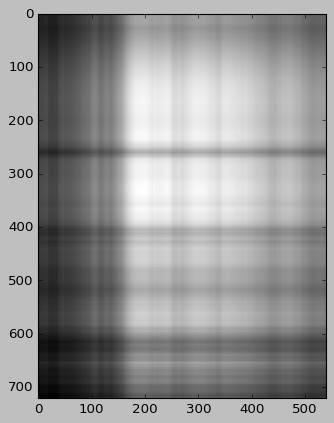

In [38]:
reconstimg = np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(V[:1, :]) #:stop value represents the first value that is not in the selected slice
plt.imshow(reconstimg, cmap='gray');

Veja que podemos utilizar bibliotecas de *truncamento*. Abaixo dois exemplos... Utilizando `sklearn` e `scipy`.

In [39]:
from sklearn.utils.extmath import randomized_svd
U, S, VT = randomized_svd(imgmat,
                              n_components=1,
                              n_iter=5,
                              random_state=None)

In [40]:
print(U.shape, S.shape,VT.shape)

(720, 1) (1,) (1, 540)


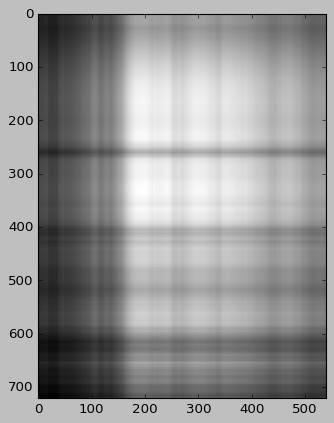

In [41]:
reconstimg =   S* U @ VT
plt.imshow(reconstimg, cmap='gray');

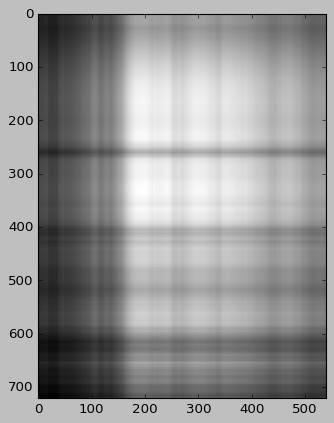

In [42]:
from scipy.sparse.linalg import svds

num_components = 1
U, S, VT = svds(imgmat, k=num_components)
reconstimg =   S* U @ VT
plt.imshow(reconstimg, cmap='gray');

Agora, faremos um loop considerando de 0 a 5 componentes.

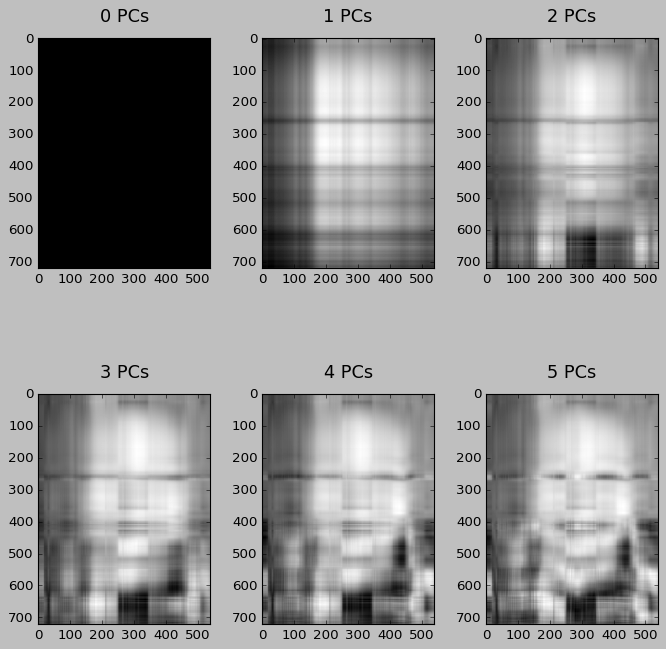

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.25)

for i in range(0, 6):
    U, S, VT = randomized_svd(imgmat, n_components=i, n_iter=5,
                              random_state=None)
    reconstimg =   S* U @ VT

    axes[i // 3, i % 3].imshow(reconstimg, cmap='gray')
    axes[i // 3, i % 3].set_title("{0} PCs".format(i), y=1.05, fontsize=16)

plt.show()

In [44]:
print(U.shape,VT.shape, S.shape)

(720, 5) (5, 540) (5,)


O loop abaixo mostra a imagem reconstruída usando os primeiros $n=5,10,15,20,...,50$ vetores da decomposição do valor singular. Os primeiros 50 vetores produzem uma imagem muito próxima da imagem original.

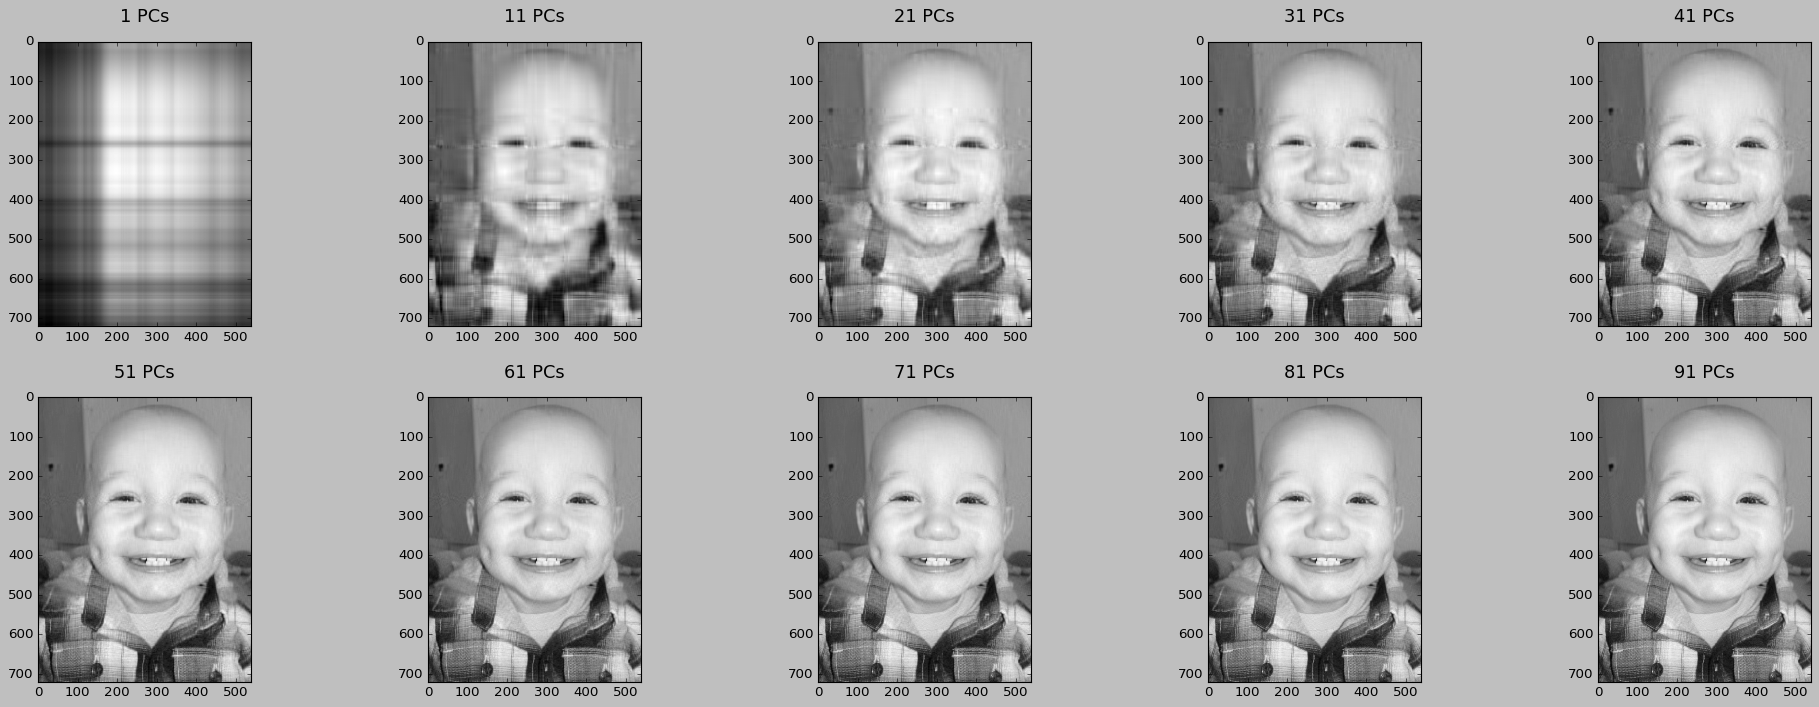

In [45]:
fig, axes = plt.subplots(2, 5, figsize=(30,10))
plt.subplots_adjust(wspace=0.3, hspace=0.25)

for i,j in enumerate(range(1, 101,10)):
    U, S, VT = randomized_svd(imgmat, n_components=j, n_iter=5,
                              random_state=None)
    reconstimg =   S* U @ VT

    axes[i // 5, i % 5].imshow(reconstimg, cmap='gray')
    axes[i // 5, i % 5].set_title("{0} PCs".format(j), y=1.05, fontsize=16)

plt.show()

### Análise de desempenho de nossa economia de espaço


In [ ]:
print("Temos %d valores singulares, que correspondem à dimensão da matriz S." % S.shape)
print("Dimensão da matriz U: ", U.shape)
print("Dimensão da matriz V:", V.shape)


Quantos valores singulares $k$ precisamos armazenar para recuperar a matriz inicial da imagem? Quantos números precisamos armazenar se quisermos reconstruir apenas uma boa aproximação de rank $k$?

Quantos números precisamos armazenar para a imagem aproximada?
A resposta é: a soma das dimensões $m$ do vetor $u$, $n$ do vetor $V$ e $1$ do valor singular da diagonal; tudo isso multiplicado pelo número $k$ de valores singulares que você considera na sua aproximação.

Quantos números você precisa armazenar para a imagem original? A matriz completa $m \times n$.

In [ ]:
#Supondo que estamos satisfeitos com nosso k=50
k=50
dim_U=U.shape[0]
dim_V=V.shape[0]

orig_dim = (dim_U*dim_V)
print("Para imagem original deve-se armazenar %d números." % orig_dim)

approx_dim = (dim_U+dim_V+1)*k
print("Para imagem aproximada com %d valores singulares, deve-se armazenar %d números." % (k,approx_dim))

economia= (approx_dim/orig_dim)*100
print("Economizou-se, %f" % economia,'%.')

## Eigenfaces

O termo *Eigenfaces* refere-se, basicamente, a um conjunto de características que definem a variação global entre as imagens faciais. O objetivo é __representar uma imagem que retrata o rosto de uma pessoa como uma combinação linear de um conjunto de imagens básicas chamadas de eigenfaces.__

Para ilustrar usaremos um dataset de imagens de rosto da biblioteca `sklearn`.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
imgs = data.images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Veja que o dataset possui $400$ imagens (`nimg`) de dimensão $64 \times 64$ (`width, height`)

In [ ]:
print(imgs.shape)
nimg,width,height=imgs.shape

(400, 64, 64)


Veja algumas imagens da biblioteca...

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(14, 8))
plt.subplots_adjust(wspace=0.4)

for i in range(0, 5):
    axes[i].imshow(imgs[i*40], cmap='gray')

plt.show()

### Exemplo: Seleção de uma face
Transforma-se os dados de cada imagem em uma matriz. O que está sendo feito no código abaixo é o seguinte:
1. O tensor `imgs` é redimensionado para $4096 \times 400$ e armazenado na matris `M` - cada coluna possui $4096 (64\times 64)$ pixels da mesma face; Pode-se pensar também que cada linha é o mesmo pixel de cada face diferente.
<center><img src='./IAD_001_Y2024_L04_files/uc(3)' width="400"></center>
2. Cria-se o vetor de zeros `x`, de dimensão $400 \times 1$ (`nimgs`). O único valor diferente de zero é a face que queremos selecionar - em nosso exemplo colocamos `facenumber=50`. Você pode escolher qualquer valor entre 0 e 399;
3. Ao multiplicar a matriz `M` pelo vetor `x`, temos o vetor `y`de dimensão $4096 \times 1$ - isto é, um vetor com as características somente da face `facenumber` que escolhemos;
4. Redimensionamos vetor `y` para uma matriz de $64\times 64$, representando a imagem que queremos analisar.

In [ ]:
M = imgs.reshape((-1, width*height)).T
x= np.zeros((nimg, 1))

# escolha a face
facenumber = 50
x[facenumber, 0] = 1

y = M @ x
print(M.shape,x.shape,y.shape)
plt.imshow(y.reshape((width,height)), cmap='gray')
plt.show()

### SVD
Aqui aplicamos SVD na matriz `M`. Lembrem-se, ela tem todas as características de todas as imagens, uma em cada coluna. Quando aplicamos SVD a essa matriz, descobrimos os valores singulares, isto é, as direções (de dimensão 4096) que mostram maior variação entre as faces.

Bom, se mostram as maiores variações, será que não serve para reconhecermos uma face??? Isso é assunto para o futuro. Spoiler do próximo curso...

<center><img src='./IAD_001_Y2024_L04_files/uc(4)' width="600"></center>

Veja, no código abaixo, os 8 primeiros valores singulares.


In [ ]:
U, s, VT = linalg.svd(M)

fig, axes = plt.subplots(2, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.1)

for i in range(0, 8):
    axes[i // 4, i % 4].imshow(U[:, i].reshape((width,height)))
    axes[i // 4, i % 4].set_title("$\mathbf{{u_{0}}}$".format(i+1), fontsize=16)

plt.show()

### Reconstrução

Veja que, com a projeção do vetor `x` particularizado para face `facenumber=160` nas direções principais conseguimos recuperar as características particulares de forma satisfatória usando os primeiros 80 valores singulares.

In [ ]:
x= np.zeros((nimg, 1))
facenumber = 160
x[facenumber, 0] = 1
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstrução da imagem usando os primeiros k valores singulares", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(imgs[facenumber], cmap='gray')
axes[0, 0].set_title("Imagem original", fontsize=14)

k_list = [1, 6, 10, 15, 20, 35, 80]
for i in range(1, 8):
    # Reconstrução da matriz usando os primeiros k valores singulares
    k = k_list[i-1]
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :] @ x

    axes[i // 4, i % 4].imshow(mat_approx.reshape((width,height)), cmap='gray')
    axes[i // 4, i % 4].set_title("k = {}".format(k), fontsize=14)

plt.show()

# Lição de casa

<center><img src='./IAD_001_Y2024_L04_files/uc(5)' width="400"></center>

Antes de fazer a lição, estude a aula. Se precisar, veja os textos dos links: [1](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d) e [2](https://blogs.sas.com/content/iml/2017/08/30/svd-low-rank-approximation.html). Se quiser, rode o programa sugerido em Python no segundo link (não é necessário, voltaremos a este tema futuramente).

1. Com os dados de altura e peso de homens e mulheres, que você pode retirar do [link](https://www.kaggle.com/mustafaali96/weight-height/version/1),
 * Ache a matriz $\boldsymbol{A}$;
 * Ache os valores singulares;
 * Ache $\boldsymbol{U}$,$\boldsymbol{D}$ e $\boldsymbol{V}$;
 * Escreva a matriz na forma: $\boldsymbol{A}_k = \sigma_1\boldsymbol{u}_1\boldsymbol{v}_1^𝑇 + \cdots + \sigma_k\boldsymbol{u}_k\boldsymbol{v}_k^𝑇$;
 * Discuta suas conclusões, analisando a matriz $\boldsymbol{A}_k$.

2.  Use uma foto da sua face de dimensão $64 \times 64$, e tente recuperá-la utilizando os valores singulares da matriz `M`. Discuta o resultado.